<a href="https://colab.research.google.com/github/Andy7204/ML-Model-Implementation/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
#Analysis of 4 stocks by taking 10 years of stock data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline
from pandas_datareader import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
data={}
yf.pdr_override()

tech_list= ['TATAMOTORS.NS', 'RELIANCE.NS','HDFCBANK.NS','TCS.NS']

end = datetime.now()
start= datetime(end.year-1, end.month, end.day)

for stock in tech_list:
    data[stock]=yf.download(stock,start,end)


company_list = ['TATAMOTORS', 'RELIANCE', 'HDFC', 'TCS']
company_name = ["TATAMOTORS", "RELIANCE", "HDFCBANK", "TCS"]



df = pd.concat(data.values(), keys= data.keys(), names= ['Company','Date'])

for company, com_name in zip(company_list,company_name):
    df[com_name]= com_name



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


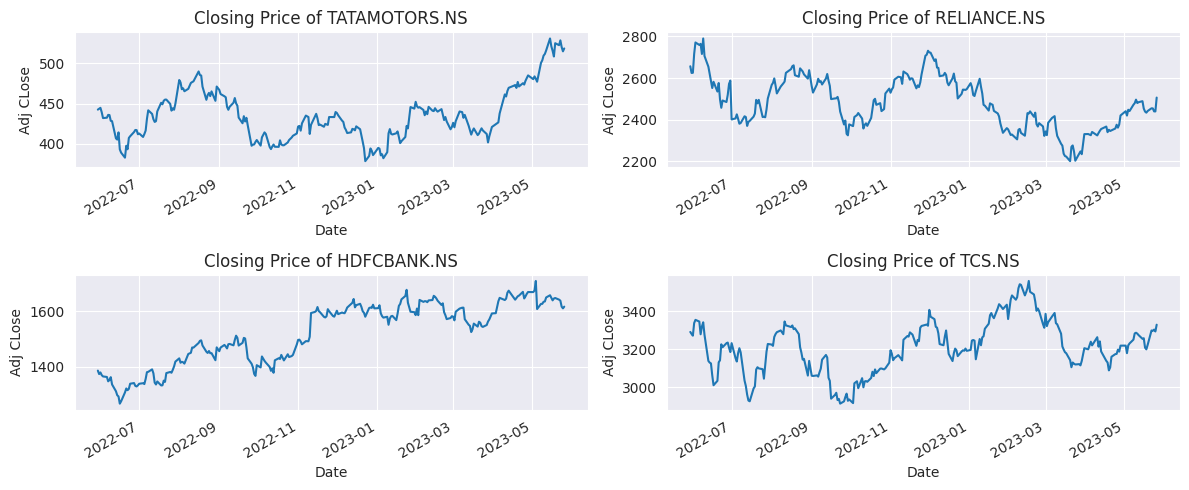

In [3]:
#Analysis is usually done on the Closing price of stocks
plt.figure(figsize=(12,5))
for i , company in enumerate(data.values(),1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj CLose')
  plt.xlabel('Date')
  plt.title(f"Closing Price of {tech_list[i-1]}")
plt.tight_layout()

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['TATAMOTORS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS']
data={}

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    data[stock] = yf.download(stock, start, end)
    

company_list = list(data.values())
company_name = ["TATAMOTORS.NS", "RELIANCE.NS", "HDFCBANK.NS", "TCS.NS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
print(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-05-30   437.000000   445.200012   436.000000   442.399994   442.399994   
2022-05-31   443.950012   449.500000   440.399994   443.549988   443.549988   
2022-06-01   445.100006   446.000000   439.600006   444.600006   444.600006   
2022-06-02   445.000000   445.600006   435.649994   439.149994   439.149994   
2022-06-03   444.899994   445.049988   430.500000   431.899994   431.899994   
...                 ...          ...          ...          ...          ...   
2023-05-22  3230.000000  3308.449951  3217.050049  3298.699951  3298.699951   
2023-05-23  3

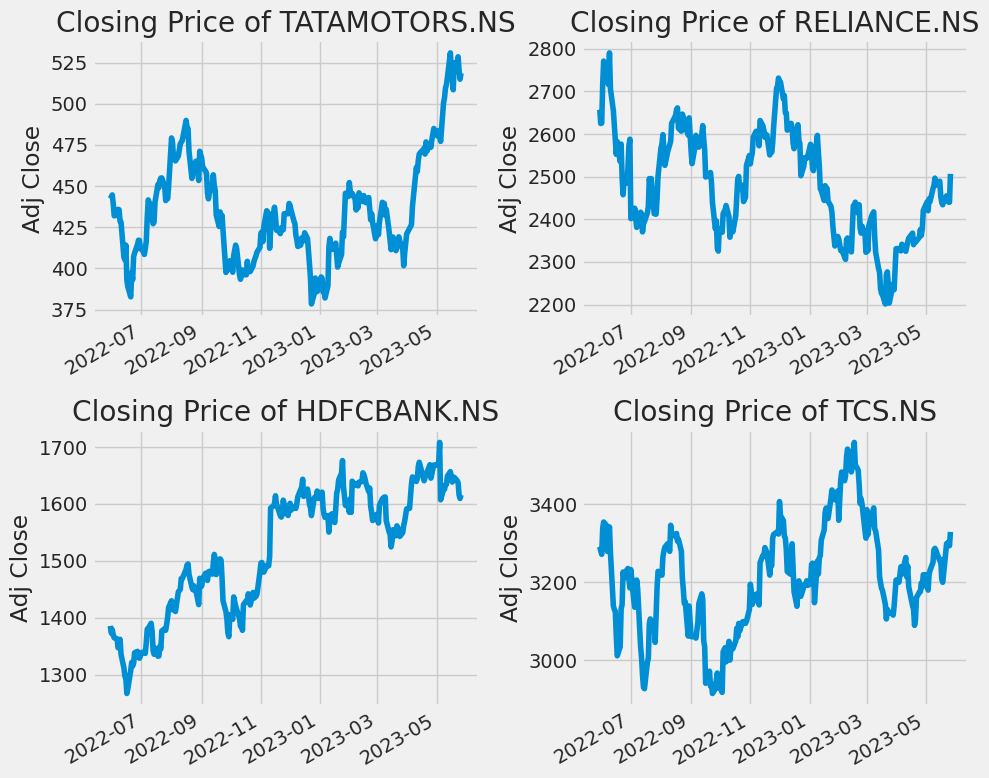

In [38]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

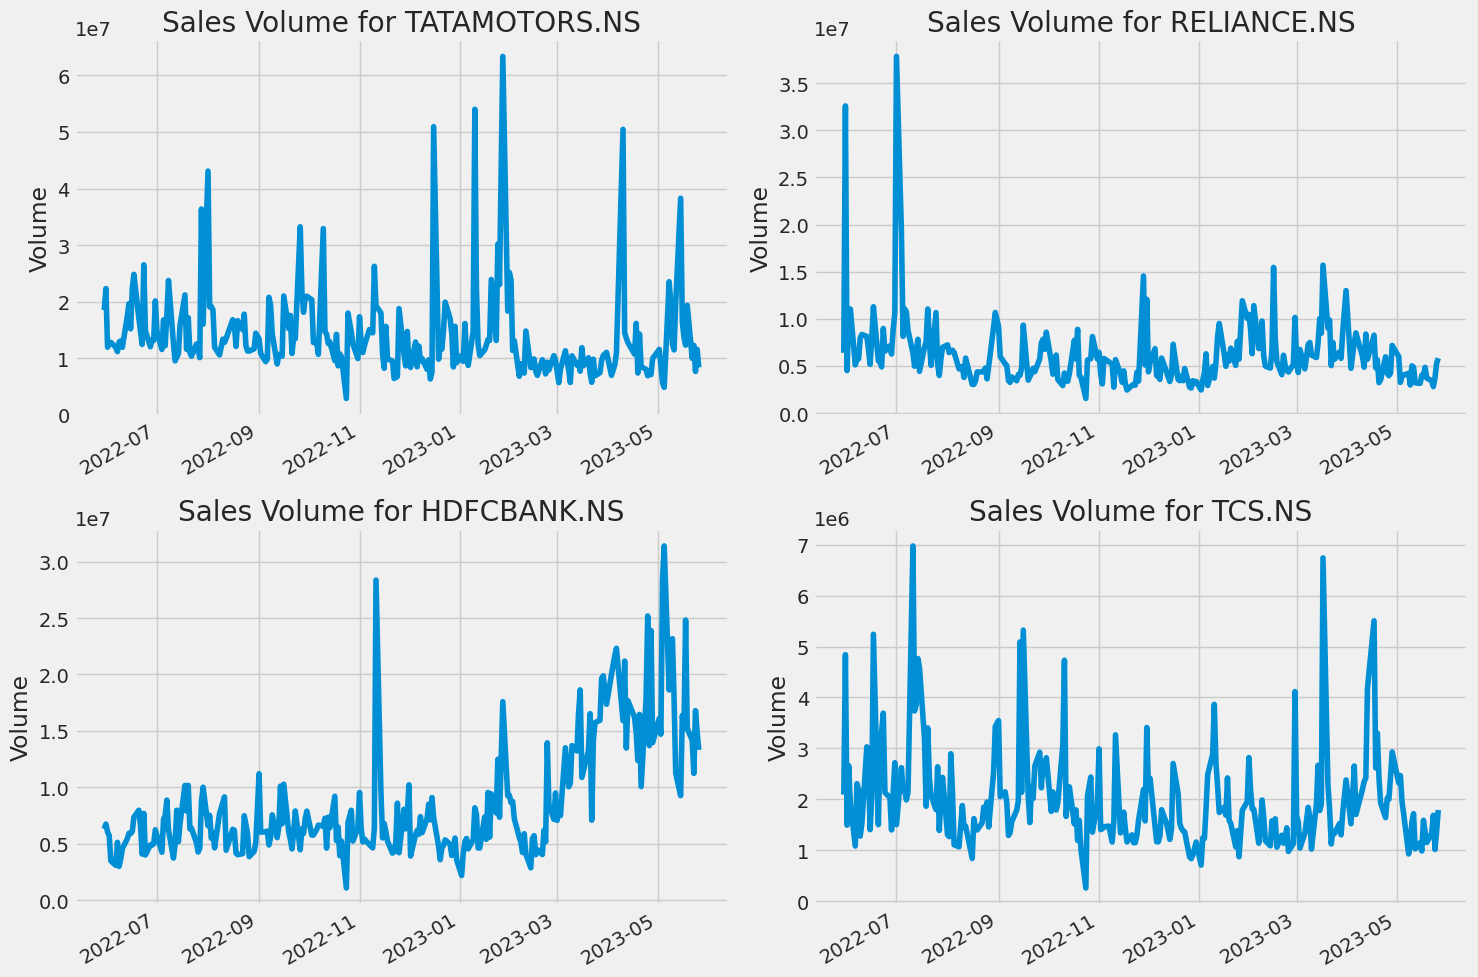

In [39]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

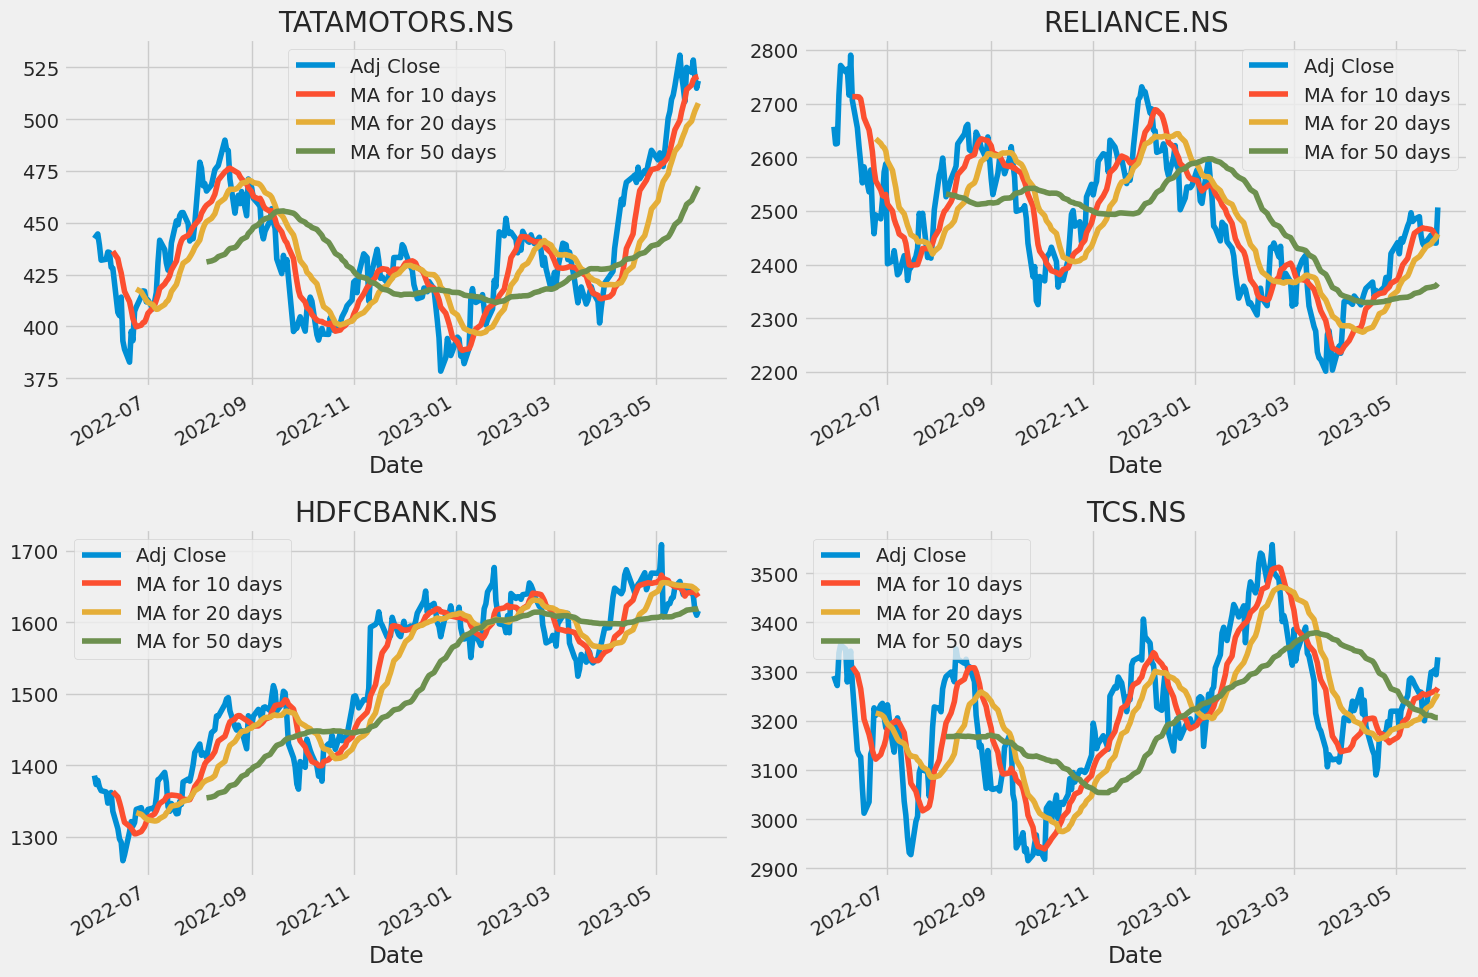

In [53]:
#Moving average indicators are useful for watching trends
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_names = ["TATAMOTORS.NS", "RELIANCE.NS", "HDFCBANK.NS", "TCS.NS"]

company_data = {}
for company, com_name in zip(company_list, company_name):
    company_data[com_name] = company

company_plots = {
    'TATAMOTORS.NS': axes[0, 0],
    'RELIANCE.NS': axes[0, 1],
    'HDFCBANK.NS': axes[1, 0],
    'TCS.NS': axes[1, 1]
}

for com_name, ax in company_plots.items():
    data = company_data[com_name]
    data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(com_name)

fig.tight_layout()


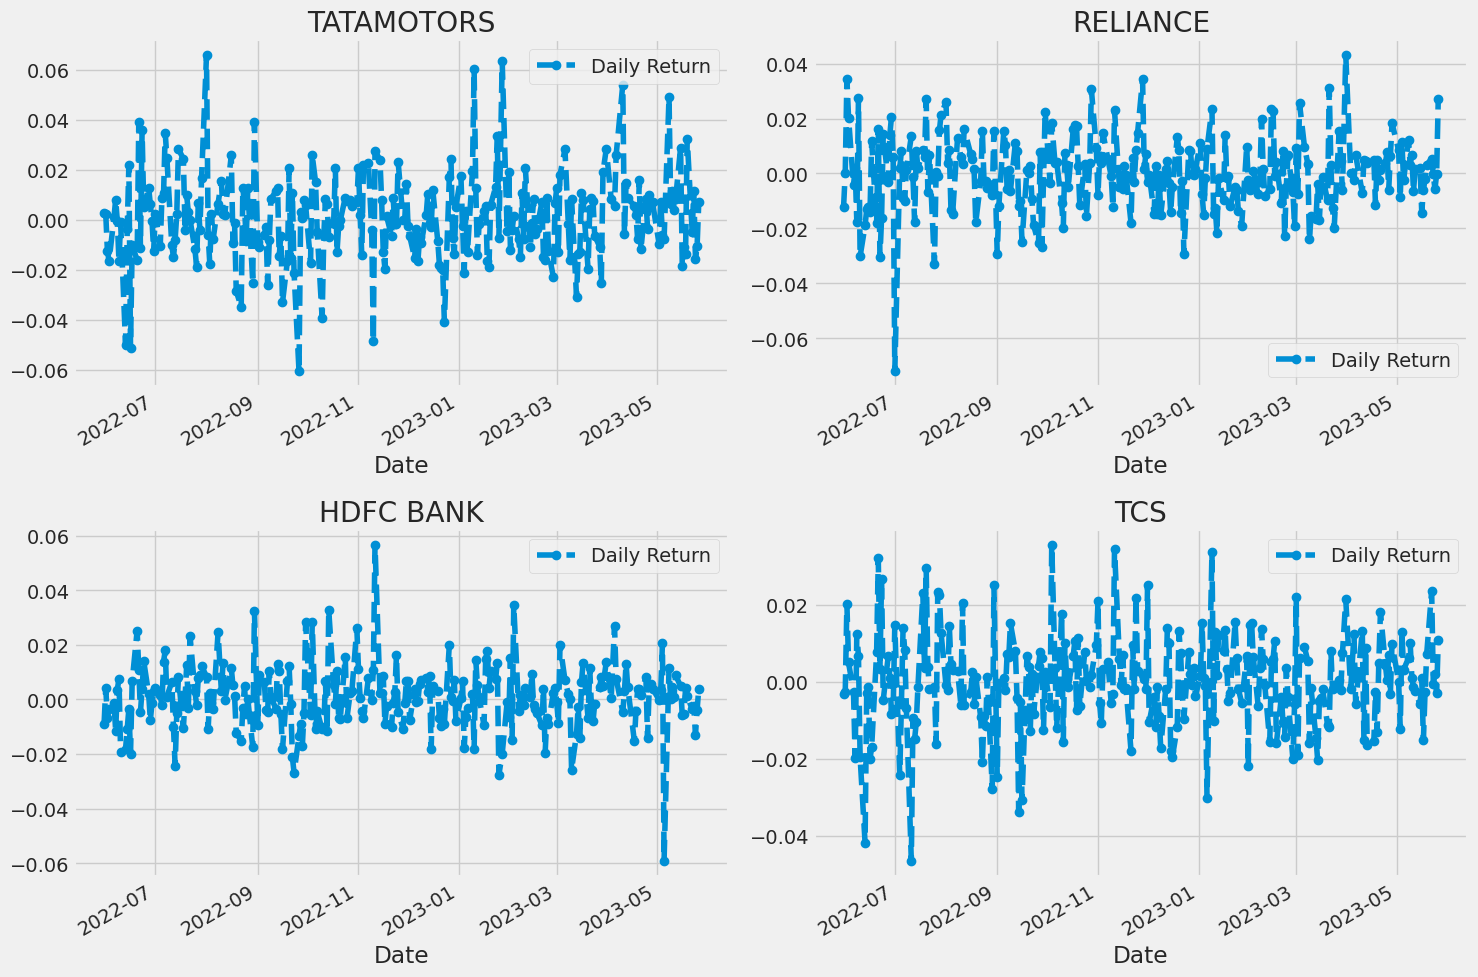

In [51]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_names = ["TATAMOTORS", "RELIANCE", "HDFC BANK", "TCS"]

company_data = {}
for company, com_name in zip(company_list, company_names):
    company_data[com_name] = company

company_plots = {
    'TATAMOTORS': axes[0, 0],
    'RELIANCE': axes[0, 1],
    'HDFC BANK': axes[1, 0],
    'TCS': axes[1, 1]
}

for com_name, ax in company_plots.items():
    data = company_data[com_name]
    data['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(com_name)

fig.tight_layout()


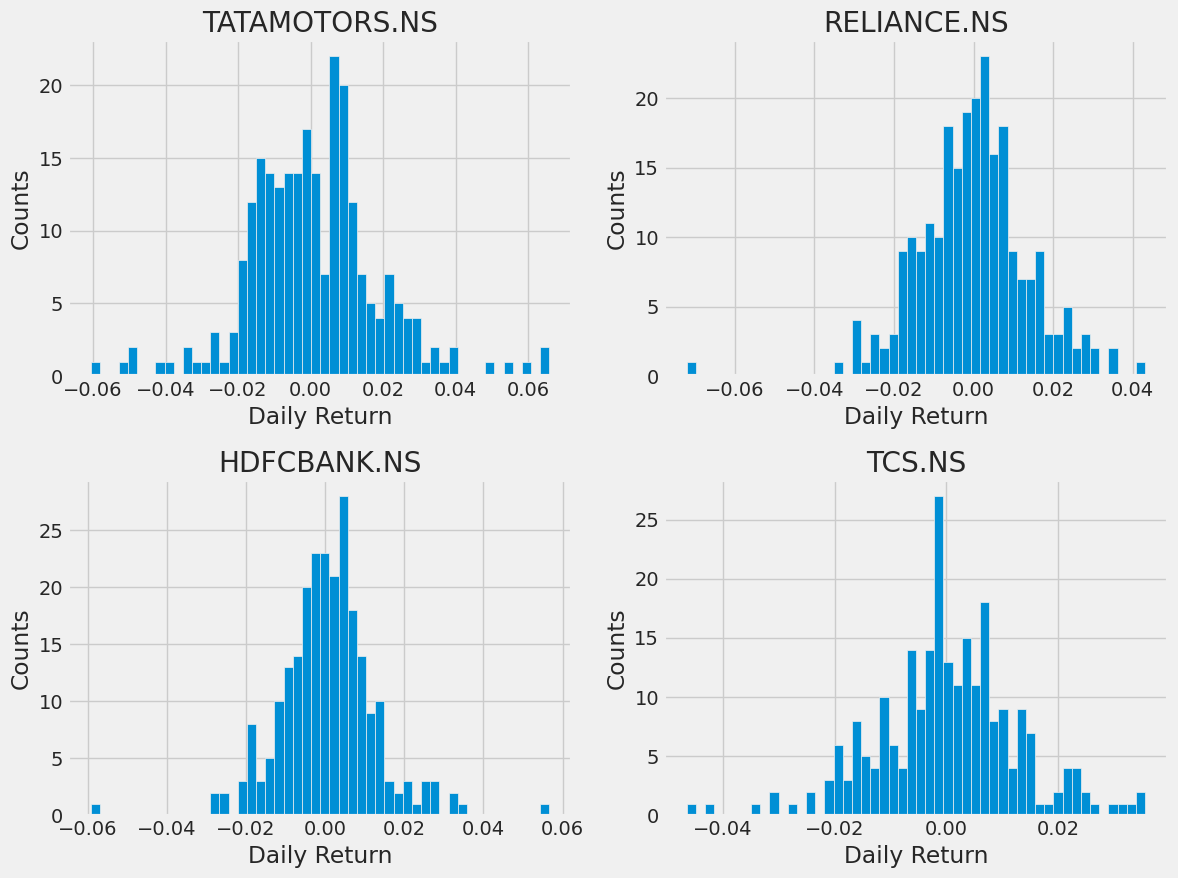

In [54]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [55]:
closing_df= pdr.get_data_yahoo(tech_list,start=start,end=end)['Adj Close']

tech_ret = closing_df.pct_change()
tech_ret.head()

[*********************100%***********************]  4 of 4 completed


,HDFCBANK.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,
2022-05-30,NaN,NaN,NaN,NaN
2022-05-31,-0.008990,-0.012065,0.002599,-0.003229
2022-06-01,0.004248,0.000323,0.002367,-0.002720
2022-06-02,-0.006990,0.034479,-0.012258,0.020207
2022-06-03,-0.003465,0.020262,-0.016509,0.005010


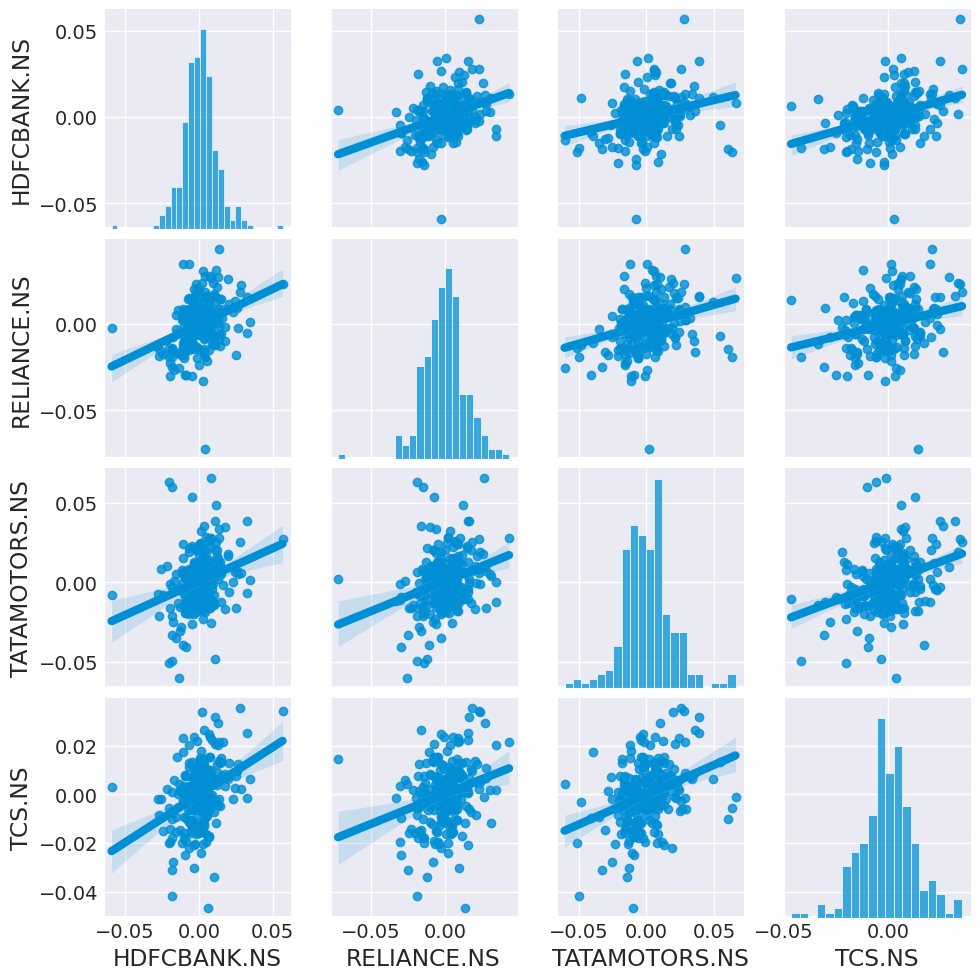

In [231]:
# Corelation of stocks with each other
sns.pairplot(tech_ret,kind='reg')
# We can see TCS and HDFC Bank has the highest corelation with each other

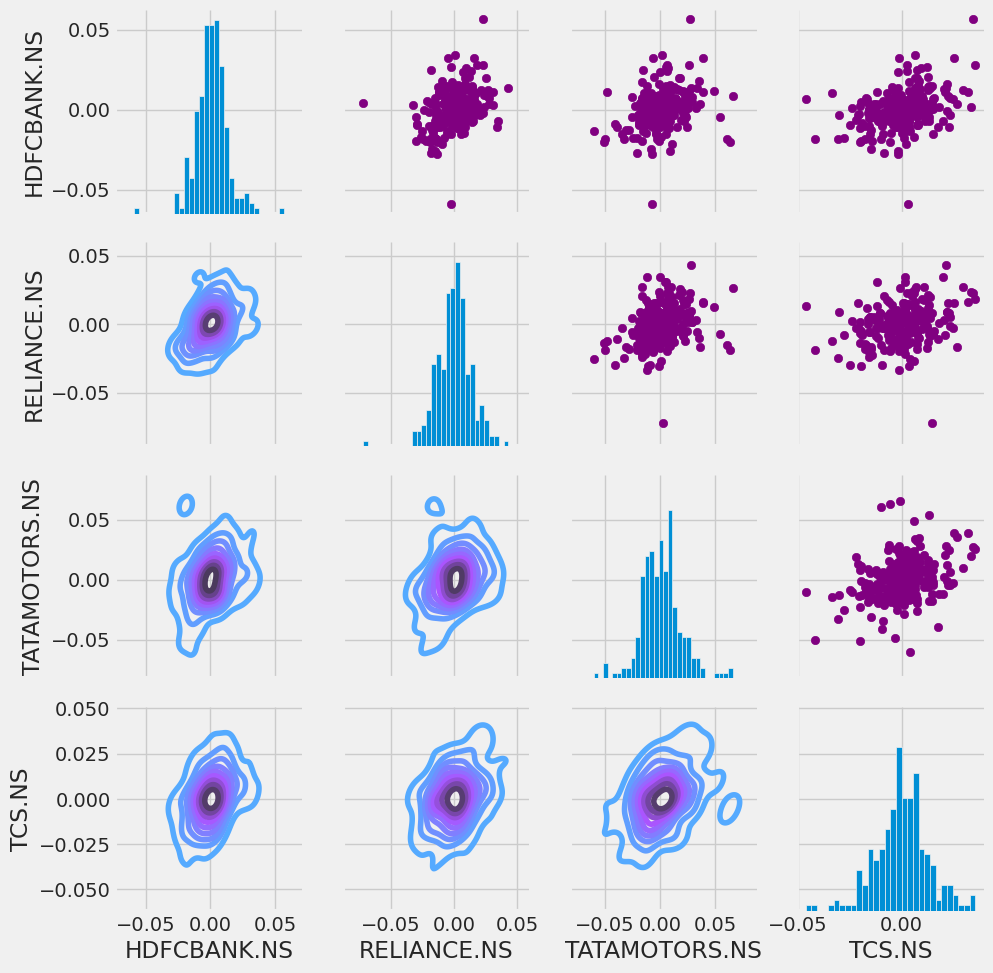

In [57]:
return_fig = sns.PairGrid(tech_ret.dropna())
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock return')

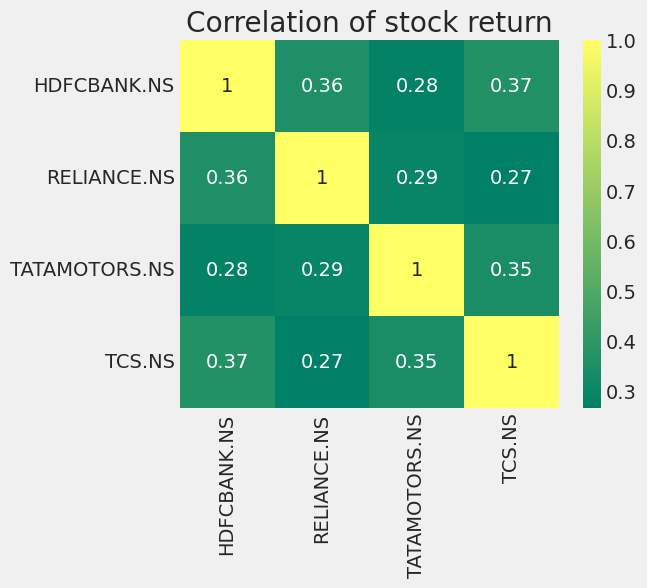

In [61]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_ret.corr(),annot=True,cmap='summer')
plt.title("Correlation of stock return")

Text(0.5, 1.0, 'Correlation of stock closing price')

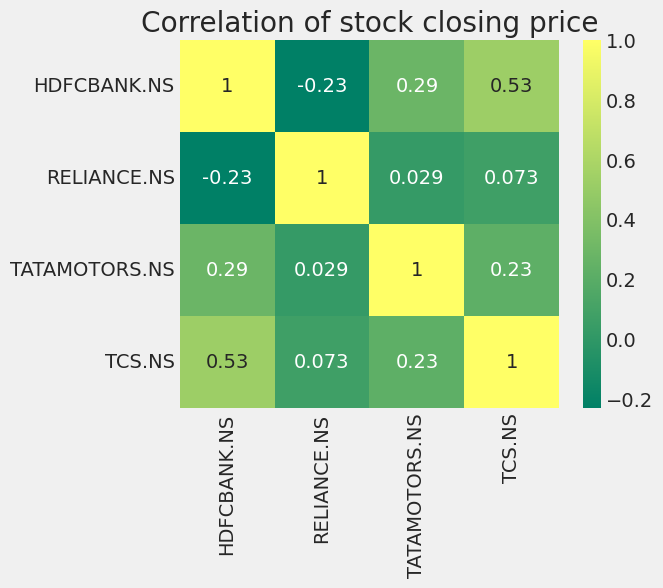

In [64]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(closing_df.corr(),annot=True,cmap='summer')
plt.title("Correlation of stock closing price")

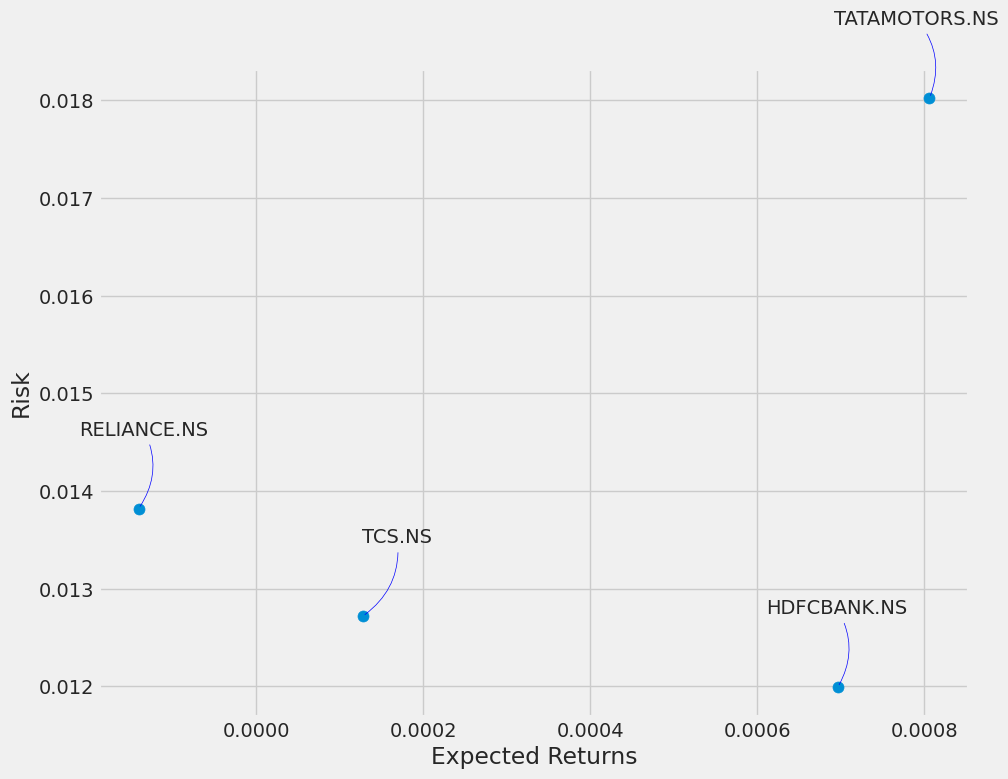

In [70]:
#Risk (STD) VS Return (Mean) Graph 
rets=tech_ret.dropna()
area=np.pi*20
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Returns")
plt.ylabel("Risk")
for label, x,y, in zip(rets.columns, rets.mean(),rets.std()):
  plt.annotate(label, xy= (x,y), xytext =(50,50), textcoords='offset points',ha='right',va='bottom',
               arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))

In [237]:
df= pdr.get_data_yahoo('TCS.NS',start='2012-01-01',end=datetime.now())
df['Close']

[*********************100%***********************]  1 of 1 completed


Date
2012-01-02     589.299988
2012-01-03     598.799988
2012-01-04     586.500000
2012-01-05     586.000000
2012-01-06     584.700012
                 ...     
2023-05-22    3298.699951
2023-05-23    3297.050049
2023-05-24    3303.350098
2023-05-25    3293.500000
2023-05-26    3328.899902
Name: Close, Length: 2811, dtype: float64

## Predicting TCS stock using LSTM Model (Long Short Term Memory Recurrent Neural Networks)

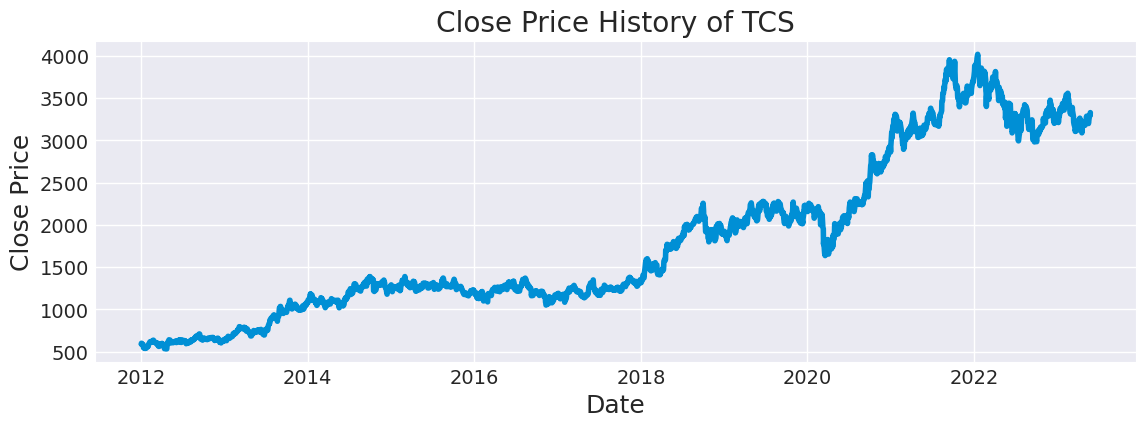

In [241]:
plt.figure(figsize=(12,4))
plt.title('Close Price History of TCS')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [242]:
data_new = df.filter(['Close'])
dataset = data_new.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
from sklearn.preprocessing import MinMaxScaler
# Normalize them
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data= scaled_data[:training_data_len]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])
# reshape array
x_train, y_train = np.array(x_train),np.array(y_train)
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1], 1)


In [232]:
# Build LSTN Model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
'''
model.add(LSTM( 128, return_sequences =True,input_shape = (x_train.shape[1],1)))
model.add(BatchNormalization())
model.add(LSTM( 64, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences=False))
model.add(Dense(64,activation = activations.relu))
model.add(Dense(64,activation = activations.relu))
model.add(Dense(1))
'''
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, batch_size = 30, epochs = 8)


Epoch 1/8
88/88 [==============================] - 20s 175ms/step - loss: 0.0080
Epoch 2/8
88/88 [==============================] - 14s 158ms/step - loss: 3.4051e-04
Epoch 3/8
88/88 [==============================] - 13s 153ms/step - loss: 3.5385e-04
Epoch 4/8
88/88 [==============================] - 12s 131ms/step - loss: 4.1608e-04
Epoch 5/8
88/88 [==============================] - 11s 122ms/step - loss: 4.9952e-04
Epoch 6/8
88/88 [==============================] - 11s 129ms/step - loss: 3.8222e-04
Epoch 7/8
88/88 [==============================] - 14s 165ms/step - loss: 2.9219e-04
Epoch 8/8
88/88 [==============================] - 12s 138ms/step - loss: 2.9714e-04


In [243]:
#Create x test dataset and process it
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions -y_test)**2))
rmse

5/5 [==============================] - 1s 36ms/step


78.37402940384831

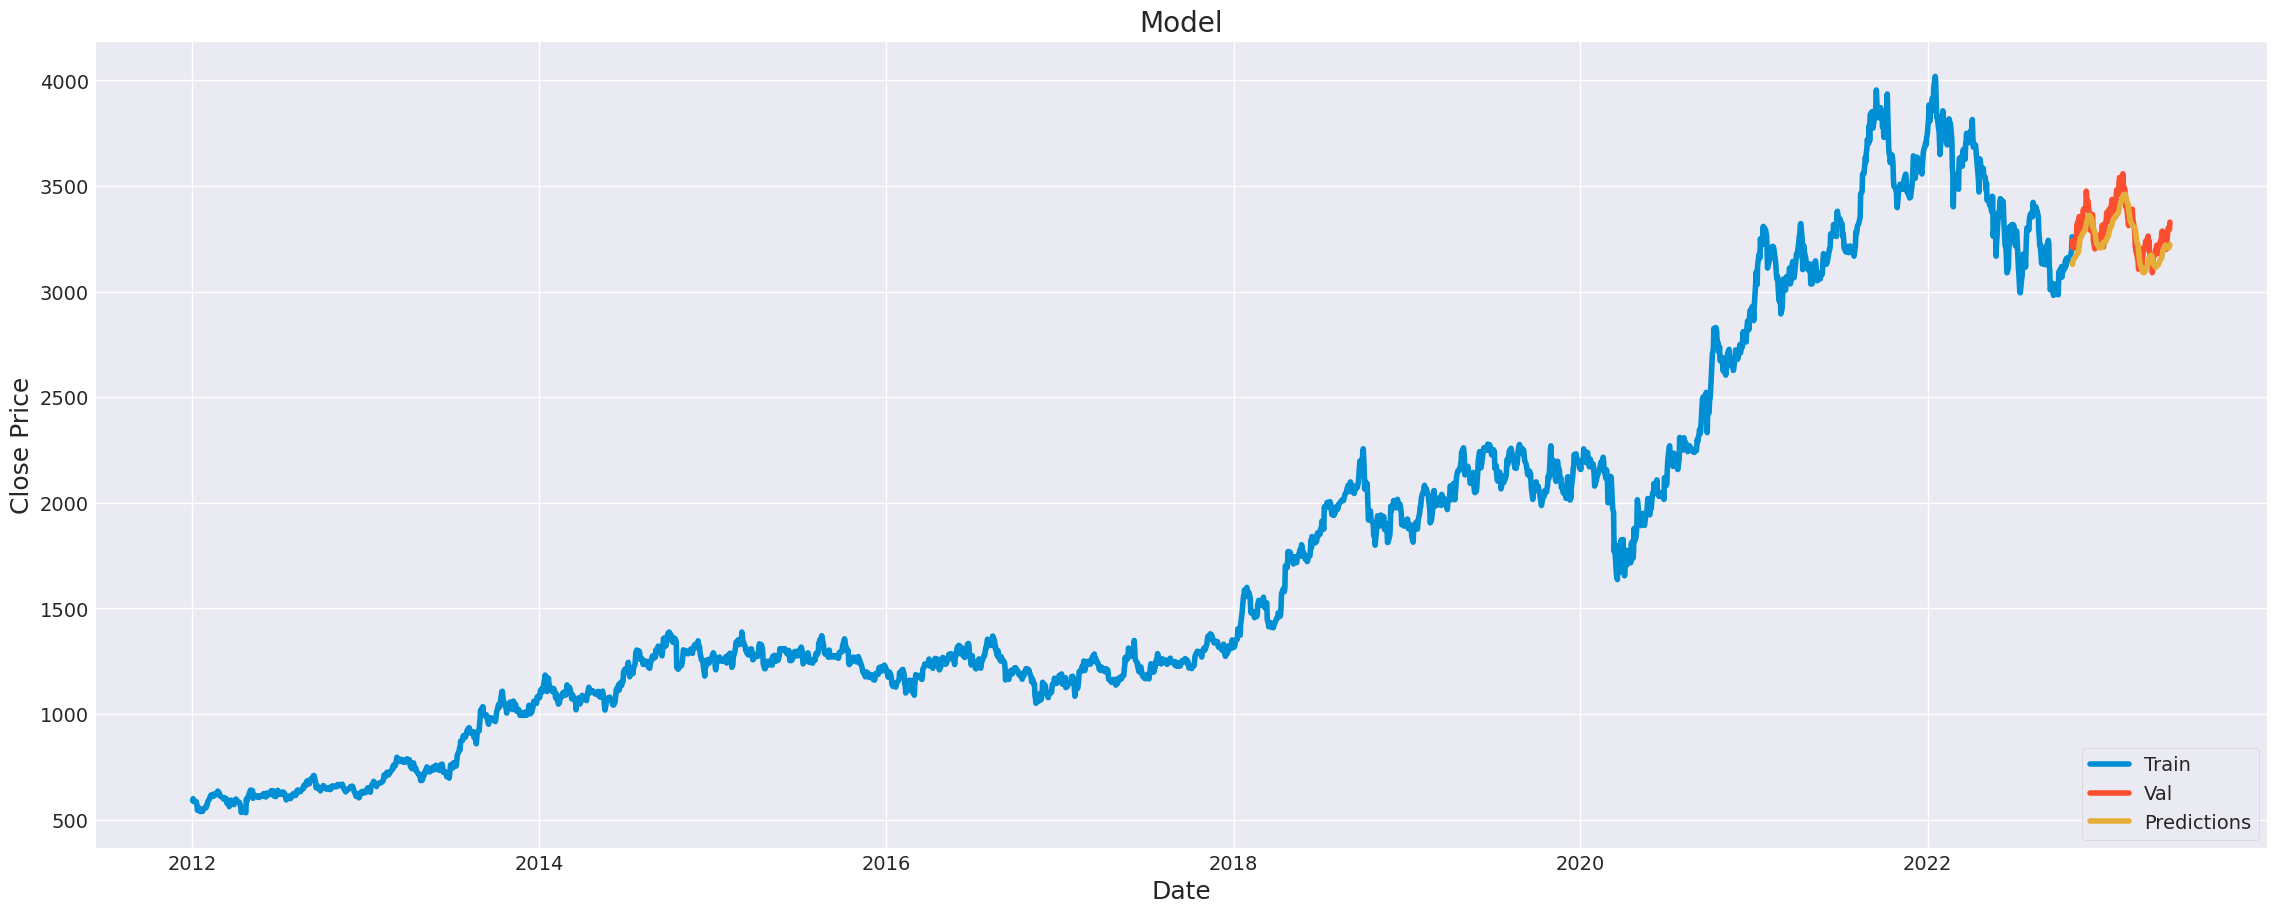

In [244]:
#Plot the data
train = data_new[:training_data_len]
valid = data_new[training_data_len:]
preds = np.squeeze(predictions)
predictions_df = pd.DataFrame(columns=['Close','Predictions'])
predictions_df['Close'] = valid['Close']
predictions_df['Predictions'] = preds
#predictions_df = pd.DataFrame(preds, columns=['Predictions'])
#Visulalise the data

plt.figure(figsize=(25,10))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(predictions_df[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()
